# Projet de Maths 1

## Contexte

On se donne une fonction $f: \mathbb{R}^2 \to \mathbb{R}$ continument différentiable. Notre objectif est de créer une fonction qui permet de tracer un contour pour une valeur $c$ donnée.

## Amorce 

On suppose ici $f$ définie sur $[0,1]^2$. On veut tout d'abord trouver un point de départ sur le coté gauche du carré pour tracer notre contour. Pour cela, on cherche un $y \in [0,1]$ tel que $f(0,y)=c$. 
On procède par dichotomie et l'on impose donc à $f$ de vérifier : $c \in [f(0,0),f(0,1)] $ ou $c \in [f(0,1),f(0,0)]$ .

In [64]:
def find_seed(g,c=0,debut=0,fin=1,eps=2**(-26)):
    if g(debut)<=c<=g(fin) or g(fin)<=c<=g(debut):
        a=debut
        b=fin
    else :
        return None
    while abs(g((a+b)/2)-c)>eps:
        milieu=(a+b)/2
        if g(a)<=c<=g(milieu) or g(a)>=c>=g(milieu):
            b=milieu
        else :
            a=milieu
    return float((a+b)/2)

### Exemple

0n teste notre fonction sur $f : x \mapsto x^2 -2$. On va obtenir une valeur approchée à eps de $\sqrt{2}$.

In [65]:
def f_1(x):
    return x**2 -2

find_seed(f_1,0,1,2)

1.4142135605216026

## Contour simple 

On peut maintenant, à partir de la fonction précédente qui nous donne un point de départ, trouver un fragment de ligne de niveau.
On procède de la manière suivante : à partir du point que l'on vient de trouver, on calcule le gradient de $f$ en ce point puis un vecteur normal au gradient de norme $\delta$, puis on se dirige dans la direction du vecteur normal au gradient (ou dans la direction opposée si l'on sort du carré). Ainsi, on obtient une liste de points espacés de $\delta$ qui sont censés vérifier $f(x,y)=c$.

In [66]:
import autograd
from autograd import numpy as np
import matplotlib.pyplot as plt

def simple_contour(f,c=0.0,delta=0.01,nb_point=100):

    def grad_f(x,y):                          # calcule le gradient de f à partir de autograd
        gr=autograd.grad
        return np.r_[gr(f,0)(x,y),gr(f,1)(x,y)]

    def g(t):                                # pour calculer le point de départ du contour sur le coté gauche
        return f(0,t)

    x=[0.0]                                    # point de départ
    y=[find_seed(g,c)]

    if y[0]==None:                   #si l'on n'a pas trouvé de point de départ
        return [],[]

    for i in range(nb_point):                 # on limte le nombre de points que l'on cherche pour avoir un programme qui finit
        grad=grad_f(x[i],y[i])                # on calcule le gradient au dernier point que l'on a trouvé
        aux=[grad[1],-grad[0]]                # puis un vecteur auxiliaire normal au gradient
        norme_aux=np.sqrt(aux[0]**2+aux[1]**2)  # puis sa norme pour le renormaliser
        vect_orthon=[delta/norme_aux*aux[0],delta/norme_aux*aux[1]]   # on calcule un vecteur normal au gradient de norme delta

        posx=x[i]+vect_orthon[0]      # abscisse du potentiel point suivant
        posy=y[i]+vect_orthon[1]      # ordonnée du potentiel point suivant


        if posx>1 or posx<0 or posy>1 or posy<0: # si jamais on sort du carré, on part dans l'autre direction
            posx=posx-2*vect_orthon[0]
            posy=posy-2*vect_orthon[1]
            
            if posx>1 or posx<0 or posy>1 or posy<0:  # si l'on sort encore, on s'arrête
                return x,y
       
        x.append(posx)    # on ajoute le nouveau point à la liste
        y.append(posy)
    
    return x,y    #on retourne le fragment de contour


### Test 

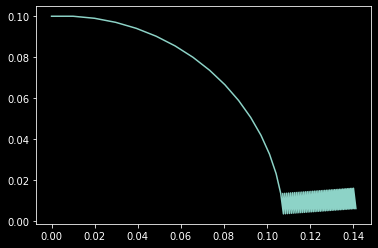

In [67]:
def f_test(x,y):
    return np.power(x,2)+np.power(y,2)

plt.close()
x,y=simple_contour(f_test,0.01)
plt.plot(x,y)
plt.show()

On contaste que le programme ne renvoie pas le résultat attendu ce qui est dû au fait que le vecteur noramal au gradient donne une direction dans laquelle il peut y avoir un point sur le contour mais c'est assez approximatif.
Pour ressoudre ce problème, on a essayé de calculer les points suivants en mettant une bouce while avec la condition d'arrêt : $\mid f(x,y)-c \mid \leq \frac{\mid c \mid}{100}$ pour ne pas trop s'éloigner de la ligne de niveau mais nous obtenions pas de résultats satisfaisants non plus car le programme n'effectuait qu'une dizaine d'étape dans le meilleur des cas.

Nous avons donc décider de changer de méthode et d'utiliser find_seed à chaque étape sur un segment du carré donné par le gradient. METTRE DESSIN !!!!

In [68]:
def simple_contour(f,c=0.0,delta=0.01):

    def grad_f(x,y):
        gr=autograd.grad
        return [gr(f,0)(x,y),gr(f,1)(x,y)]

    def g(t):
        return f(0,t)

    x=[0.0]
    y=[find_seed(g,c)]


    for i in range(1000):
        if x[-1]==None or y[-1]==None:
            return x[:-1],y[:-1]
        grad=grad_f(x[-1],y[-1])
        aux=[grad[1],-grad[0]]
        norme_aux=np.sqrt(aux[0]**2+aux[1]**2)
        vect_orthon=[delta/norme_aux*aux[0],delta/norme_aux*aux[1]]
        posx=x[-1]+vect_orthon[0]
        posy=y[-1]+vect_orthon[1]
        if posx>1 or posx<0 or posy>1 or posy<0:
            posx=posx-2*vect_orthon[0]
            posy=posy-2*vect_orthon[1]
            if posx>1 or posx<0 or posy>1 or posy<0:
                return x,y

        elif i>=1 and vect_orthon[0]*(x[i]-x[i-1])+vect_orthon[1]*(y[i]-y[i-1])<0:
            posx=posx-2*vect_orthon[0]
            posy=posy-2*vect_orthon[1]


        if grad[0]==0.0:
            x.append(posx)
            y.append(find_seed(lambda t:f(posx,t),c,max(posy-delta,0),min(posy+delta,1)))

        else :
            t=find_seed(lambda t:f(t,posy+(t-posx)*grad[1]/grad[0]),c,max(posx-delta,0),min(posx+delta,1))
            x.append(t)
            try :
                y.append(posy+(t-posx)*grad[1]/grad[0])
            except:
                y.append(0)
    return x,y

### Exemple

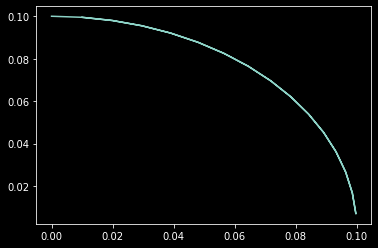

In [69]:
plt.close()
x,y=simple_contour(f_test,0.01)
plt.plot(x,y)
plt.show()

Résultat beaucoup plus satisfaisant !!

## Contour complexe

On cherche maintenant à tracer le contour d'une fonction dans un cadre général c'est-à-dire pour un domaine quelconque. Pour cela, on découpe le domaine en cellules carrées (grâce à xc et yc). On peut alors exploiter la méthode utilisée pour le contour simple sur chacune de ces cellules en renormalisant le domaine et en cherchant cette fois des amorces sur toute la frontière de la cellule.
On récupère alors un ensemble de fragments de contour qui permettent finalement de réaliser le tracé de contour voulu.

Tout d'abord, afin d'effectuer une recherche d'amorce sur tous les bords de la cellule nous avons besoin de réaliser des rotations sur la fonction initiale: nous implémentons donc une fonction rotation.

In [70]:
def rotation(g):      #Si g est définie sur [0,1]x[0,1], renvoie la fonction g rotationnée de pi/2
    return lambda x,y : g(y,1-x)

Nous pouvons maintenant implémenter la fonction qui va nous renvoyer les fragments du contour voulu.

In [71]:
def contour(f,c=0.0,xc=[0.0,1.0], yc=[0.0,1.0], delta=0.01):

    xs=[]
    ys=[]
    for i in range(len(xc)-1):
        for j in range(len(yc)-1):
            deb_x=xc[i]
            fin_x=xc[i+1]
            deb_y=yc[j]
            fin_y=yc[j+1]
            ecart_x=fin_x-deb_x
            ecart_y=fin_y-deb_y

            def f_nor(x,y):                # On se ramène à une fonction 'normalisée' définie sur [0,1]x[0,1]
                return f(x*ecart_x+deb_x,y*ecart_y+deb_y)

            def ajout_renormalisation(liste_x,liste_y):
                for x in liste_x:
                    xs.append(x*ecart_x+deb_x)
                for y in liste_y:
                    ys.append(y*ecart_y+deb_y)

            x_gauche,y_gauche=simple_contour(f_nor,c,delta)
            x_haut,y_haut=simple_contour(rotation(f_nor),c,delta)
            x_droite,y_droite=simple_contour(rotation(rotation(f_nor)),c,delta)
            x_bas,y_bas=simple_contour(rotation(rotation(rotation(f_nor))),c,delta)

            ajout_renormalisation(x_gauche,y_gauche)
            ajout_renormalisation(y_haut,[1-x for x in x_haut])
            ajout_renormalisation([1-x for x in x_droite],[1-y for y in y_droite])
            ajout_renormalisation([1-y for y in y_bas],x_bas)

    return xs,ys

### Test

On réalise le test de ce programme avec la fonction $f(x,y)=2(g(x,y)-h(x,y))$ où $g(x,y)=\exp(-x^2-y^2)$ et $h(x,y)=\exp(-(x-1)^2-(y-1)^2)$.

In [72]:
def g(x,y):
    return np.exp(-np.power(x,2)-np.power(y,2))
def h(x,y):
    return g(x-1,y-1)

def f_test2(x,y):
    return 2*(g(x,y)-h(x,y))

Finalement on peut tracer les lignes de niveau de la fonction test.

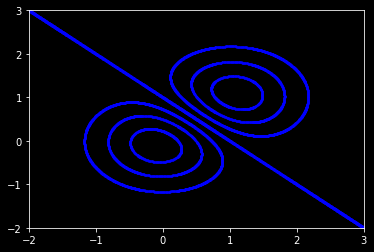

In [74]:
from scipy import*
quadri=linspace(-2,3,10).tolist()
plt.close()
for n in [-1.5,-1.0,-0.5,0.0,0.5,1.0,1.5]:
    x,y=contour(f_test2,n,quadri,quadri)
    plt.scatter(x,y,color='blue',s=1)
plt.xlim(-2.0,3.0)
plt.ylim(-2.0,3.0)
plt.show()

## Conclusion